In [1]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import jieba
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd
import glob
fm.fontManager.addfont("C:/Users/Administrator/Downloads/SourceHanSerifTW-VF.ttf")
mpl.rc('font', family='Source Han Serif TW VF')

In [2]:
with open("C:/Users/Administrator/INTERN/stopwords_zhTW.txt",  encoding='utf-8') as f:
    stopword_list = [s for s in f.read().split('\n')]

In [3]:
folder_path = "C:/Users/Administrator/INTERN/Chinatimes_news/"
all_files = glob.glob(folder_path + "/*.csv")

dfs = []
for filename in all_files:
    df = pd.read_csv(filename)
    dfs.append(df)
df_article = pd.concat(dfs, ignore_index=True)


if 'Text' not in df_article.columns:
    raise ValueError("The column 'Text' is not found in the DataFrame")

jieba_results = []
for sent in df_article['Text']:
    w_string = str()
    ws = jieba.cut(sent, cut_all=False) 
    for w in ws:
        if w not in stopword_list:
            w_string += w + ' '
    jieba_results.append(w_string.strip())  

df_article['sent_jieba'] = jieba_results


print(df_article.head())
print(df_article['sent_jieba'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.699 seconds.
Prefix dict has been built successfully.


                                                Link Category  \
0  https://www.chinatimes.com/opinion/20240605002...       言論   
1  https://www.chinatimes.com/opinion/20240605001...       言論   
2  https://www.chinatimes.com/opinion/20240605001...       言論   
3  https://www.chinatimes.com/opinion/20240605001...       言論   
4  https://www.chinatimes.com/opinion/20240605000...     工商時報   

                        Title Publish_time  \
0       海外看世界》日本大學生的中國研修（羅歡鎮）   2024/06/05   
1     海外看世界》有關中美人文交流的一點看法（王棟）   2024/06/05   
2  海納百川》重挫國家形象 王義川事件不容輕縱（李貴敏）   2024/06/05   
3     玉淵譚天》歐盟推遲對華行動，如何理解？（譚主）   2024/06/05   
4           工商社論》不變不行的台積電怎麼變？   2024/06/05   

                                                Text  \
0  \n當今的日本社會，從上到下，瀰漫著一股仇視中國、恐懼中國的情緒。仇中恐中情緒，既來自於百年...   
1  \n\n就在不久前，第14屆中美旅遊高層對話在陝西西安開幕，主題為「旅遊促進中美人文交流」。...   
2  \n日前，民進黨政策會執行長王義川自曝比對參加群眾運動者的手機訊號，引發全民譁然，媒體撻伐。...   
3  \n最近幾天，有一條關於歐洲的消息值得關註：\n根據德國媒體披露，歐盟委員會原本計劃在6月5...   
4  晶圓代工龍頭台積電6月4日舉行股東會，董事長一職正式由魏哲家接任，外界也關注身處人工智慧（A...

In [4]:
vectorizer = CountVectorizer()   #stop_words=stopword_list
transformer = TfidfTransformer()
X = vectorizer.fit_transform(df_article['sent_jieba'])
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()


print(weight.shape)
print(tfidf[0])
print(weight[0])

(1383, 57442)
  (0, 57361)	0.032498001397141964
  (0, 57353)	0.035792457761359184
  (0, 57062)	0.026579388419302054
  (0, 56694)	0.058510299467437236
  (0, 56644)	0.026579388419302054
  (0, 56482)	0.032498001397141964
  (0, 56434)	0.021306853351839804
  (0, 54624)	0.01536463777359044
  (0, 54074)	0.034345013233841
  (0, 53803)	0.032498001397141964
  (0, 53630)	0.01924792927459811
  (0, 52745)	0.034345013233841
  (0, 51512)	0.032498001397141964
  (0, 51345)	0.021306853351839804
  (0, 51031)	0.022839582534529907
  (0, 51024)	0.034345013233841
  (0, 50949)	0.01427112167586438
  (0, 50939)	0.034345013233841
  (0, 50803)	0.024596387627708053
  (0, 50225)	0.047267626139495825
  (0, 49995)	0.034345013233841
  (0, 49838)	0.034345013233841
  (0, 49653)	0.028030038053647406
  (0, 49399)	0.028030038053647406
  (0, 49270)	0.025166542252438015
  :	:
  (0, 4391)	0.031187525643744204
  (0, 4264)	0.014769624742353864
  (0, 4243)	0.032498001397141964
  (0, 4213)	0.02581840833600601
  (0, 4193)	0.027013

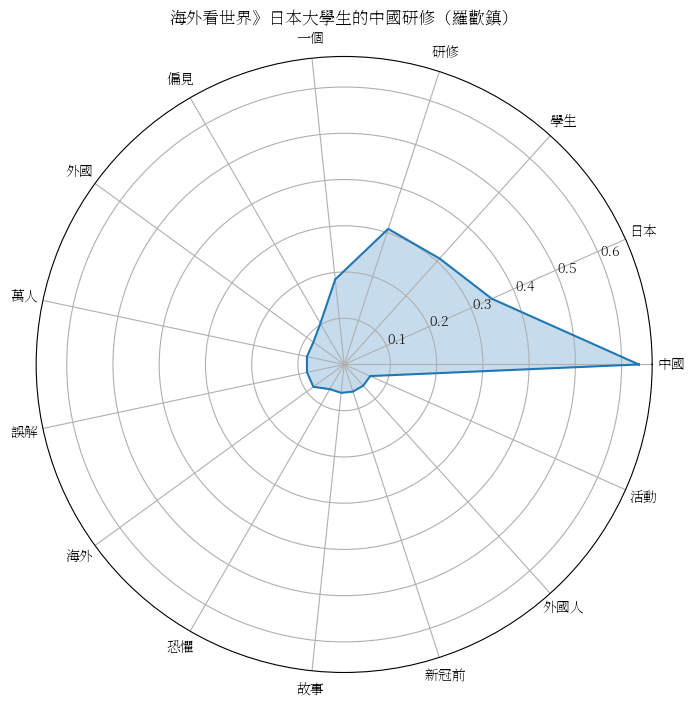

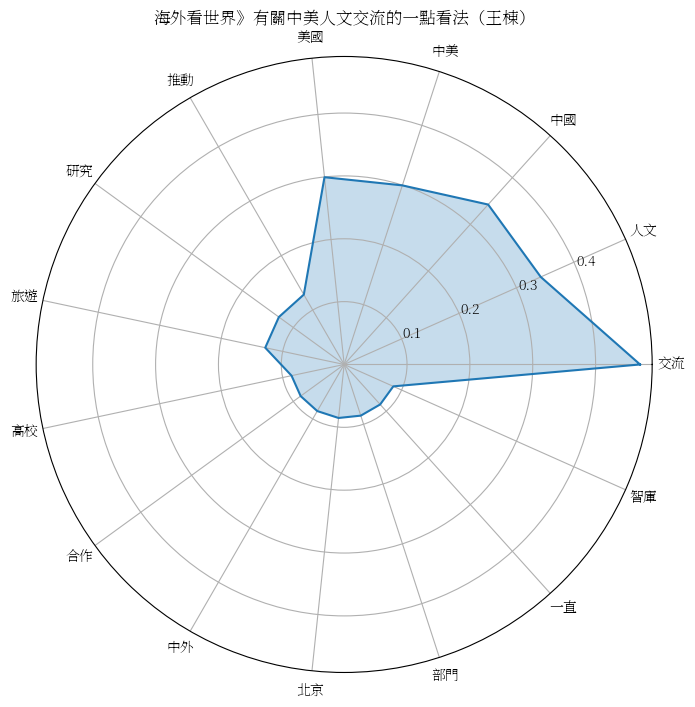

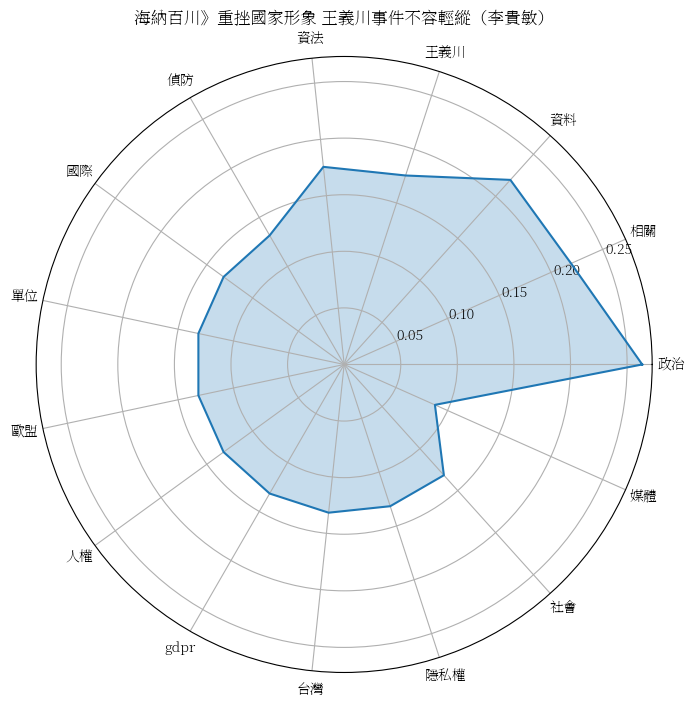

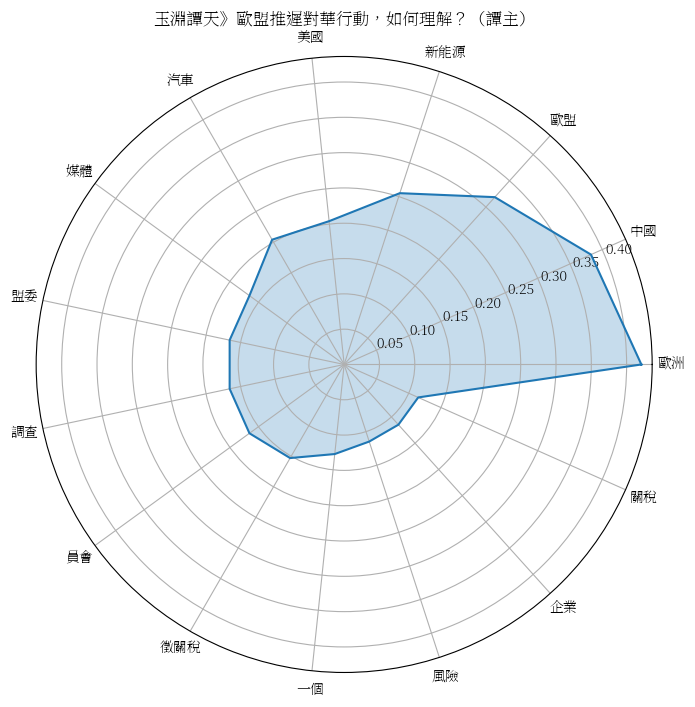

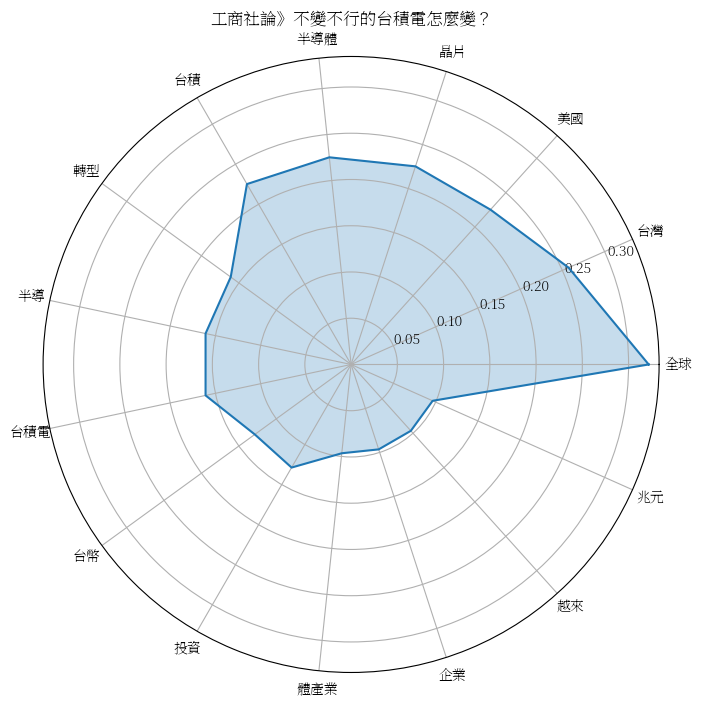

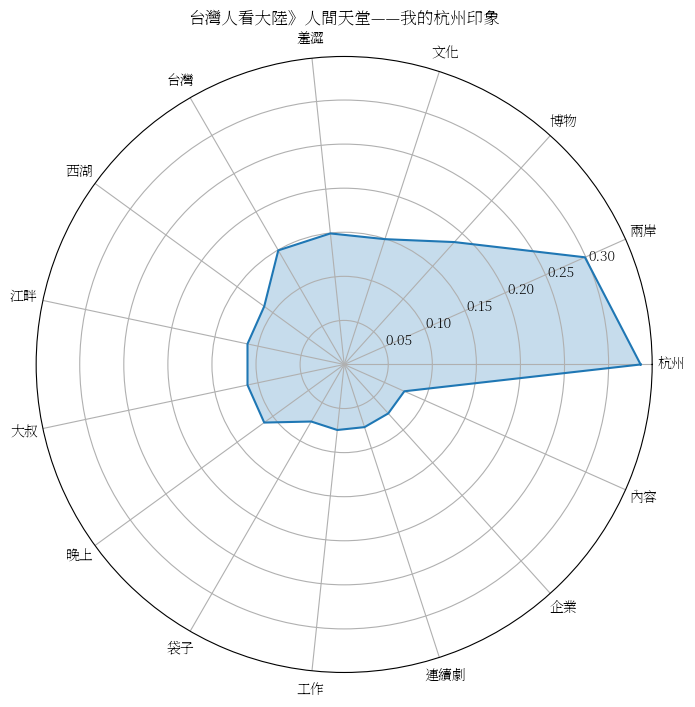

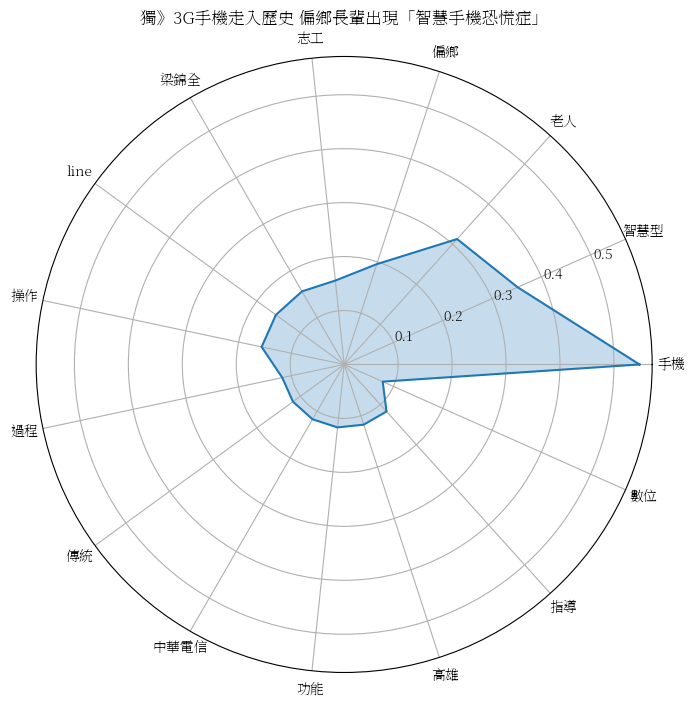

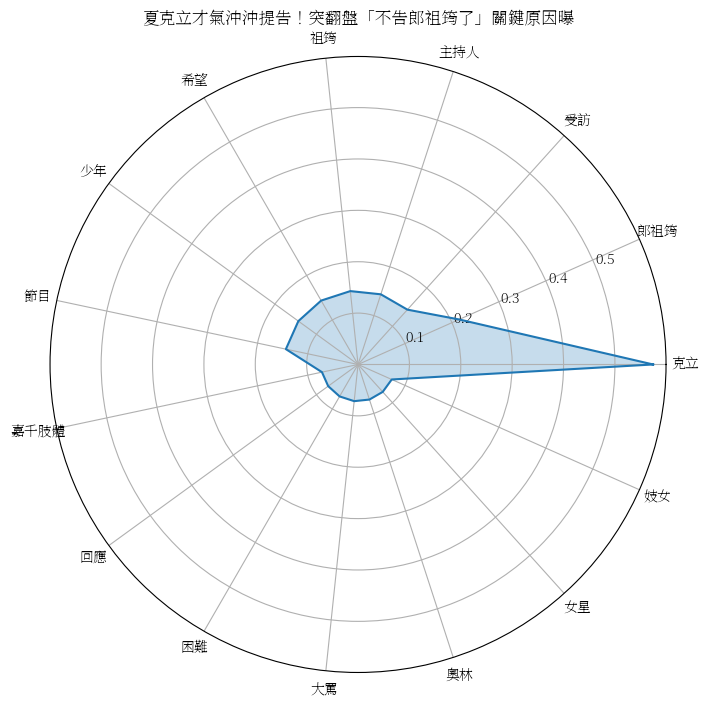

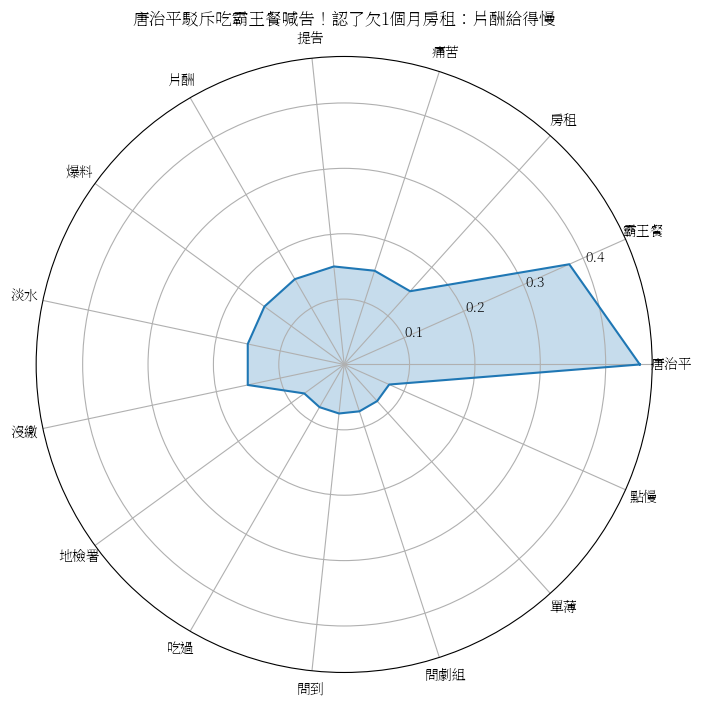

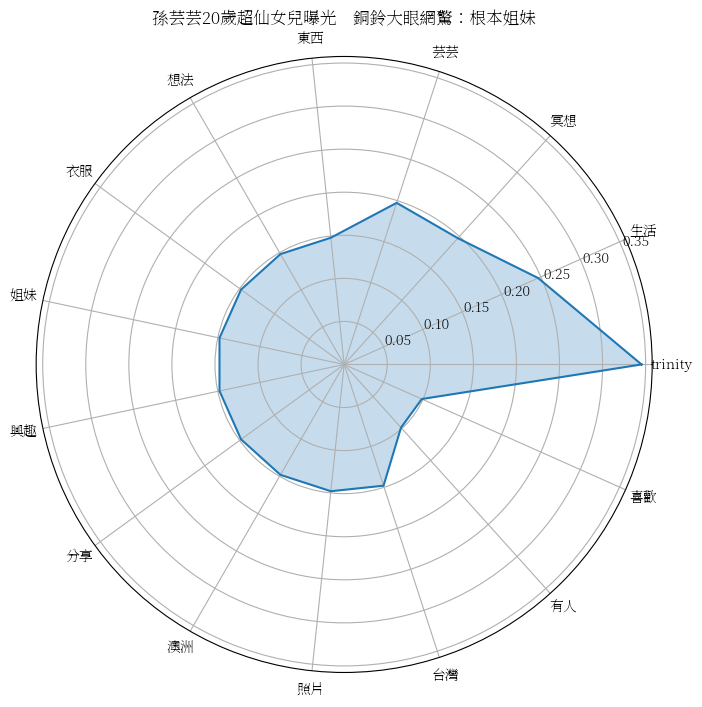

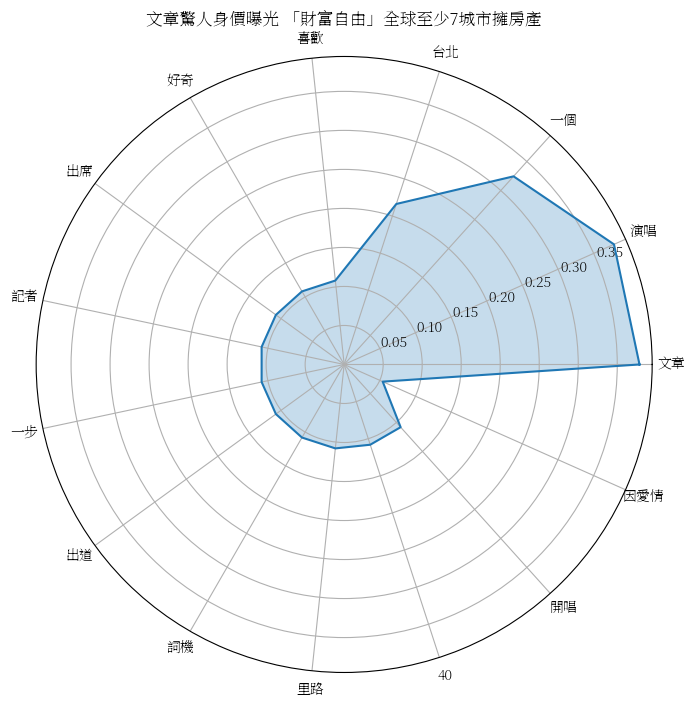

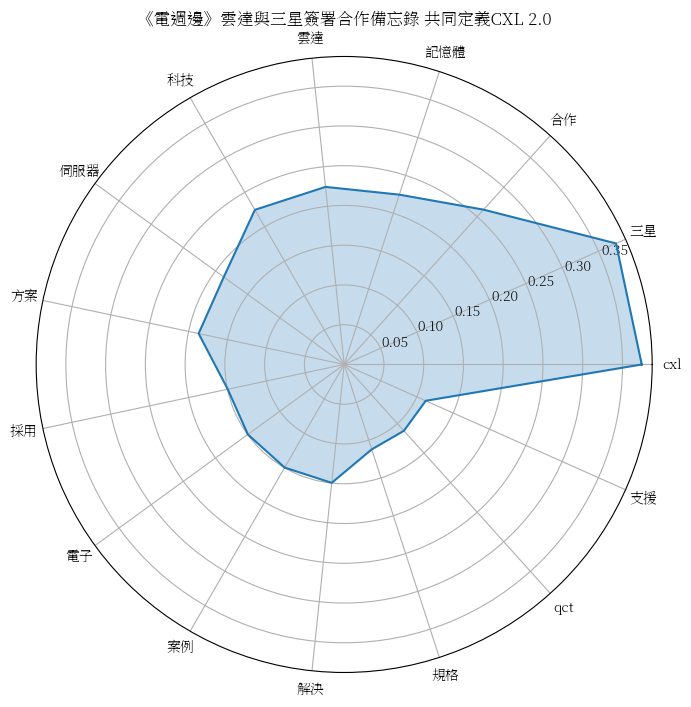


KeyboardInterrupt



In [11]:
for idx, (document, title) in enumerate(zip(df_article['sent_jieba'], df_article['Title'])):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform([document])
    
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(X)
    weights = tfidf.toarray().flatten()
    
    top_n = 15
    top_n_indices = weights.argsort()[-top_n:][::-1]
    top_n_words = [vectorizer.get_feature_names_out()[i] for i in top_n_indices]
    top_n_tfidf = [weights[i] for i in top_n_indices]
    
    plt.figure(figsize=(8, 8))
    angles = np.linspace(0, 2 * np.pi, len(top_n_words), endpoint=False).tolist()
    top_n_tfidf = np.concatenate((top_n_tfidf, [top_n_tfidf[0]]))
    angles += angles[:1]
    
    plt.polar(angles, top_n_tfidf)
    plt.fill(angles, top_n_tfidf, alpha=0.25)
    plt.xticks(angles[:-1], top_n_words, rotation=90)
    plt.title(title)
    plt.show()